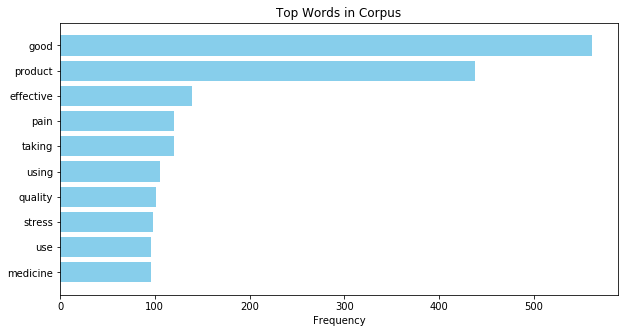

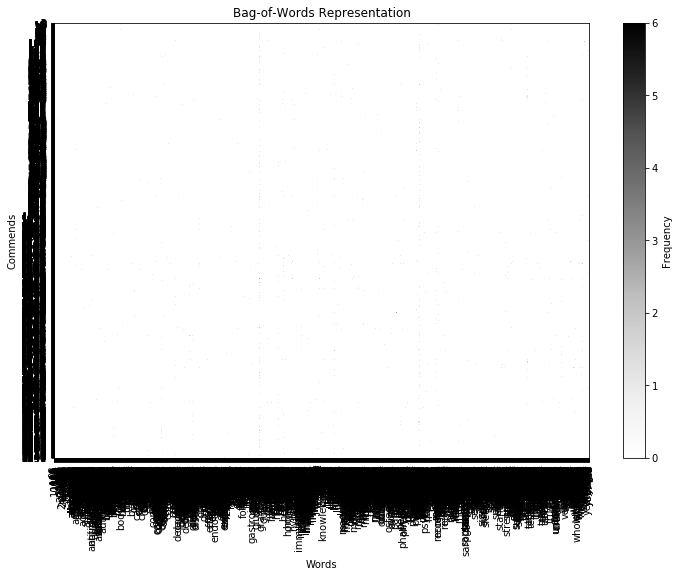

C:\Users\nidhi\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\nidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


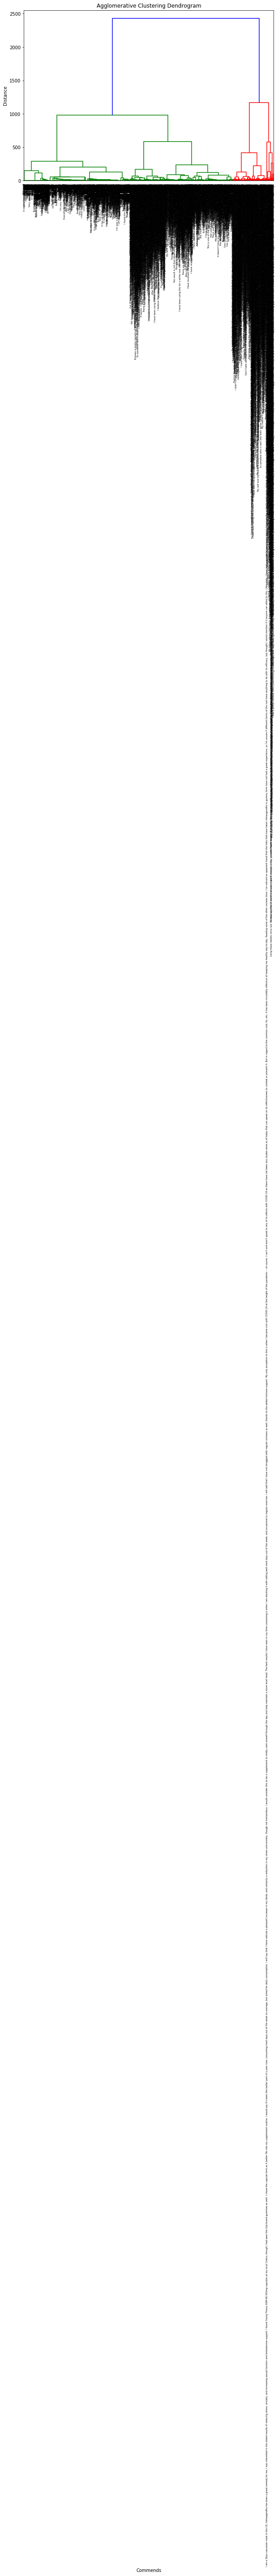

C:\Users\nidhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


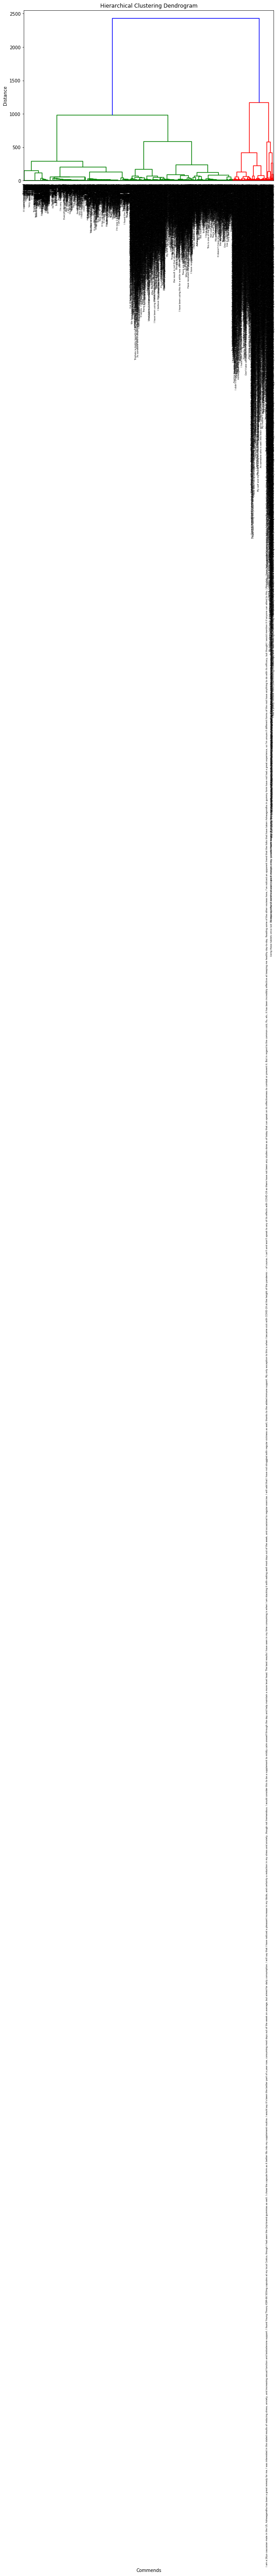

                                                Commend  agglo_cluster  \
0                                            Great  sir             98   
1                                     Thank You so much             21   
2                                          Very helpful             33   
3                                         Best medicine             74   
4                               Best Ayurvedic medicine            704   
5                                        Amazing result            105   
6                                           Recommended             35   
7                            Would definitely recommend             90   
8                                                  Good              1   
9                                     Now under control             59   
10                                                   Ok             22   
11                                    Good but costlier             13   
12                                    

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Step 1: Load your data from Excel file
df = pd.read_excel(r"C:\Users\nidhi\Downloads\Ayurvedic_medicine_final.xlsx")
 # Replace with your Excel file path
# Assuming your comments are in a column named 'Commend'
comments = df['Commend']  # Replace 'Commend' with your actual column name

# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)

# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()

# --- Bag-of-Words Visualization ---
# Convert bag-of-words to DataFrame for better visualization
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(12, 8))
plt.imshow(bag_of_words_df, cmap='Greys', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Bag-of-Words Representation')
plt.xlabel('Words')
plt.ylabel('Commends')
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), labels=bag_of_words_df.columns, rotation=90)
plt.yticks(ticks=np.arange(len(bag_of_words_df)), labels=df.index)
plt.show()

# --- Agglomerative Clustering ---
# Step 4: Perform Agglomerative Clustering
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agglo_model.fit(distances)

# Step 5: Plot Dendrogram for Agglomerative Clustering
linkage_matrix_agglo = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_agglo, labels=comments.values, leaf_rotation=90)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Commends')
plt.ylabel('Distance')
plt.show()

# --- Hierarchical Clustering ---
# Step 6: Perform Hierarchical Clustering and plot dendrogram
linkage_matrix_hierarchical = linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_hierarchical, labels=comments.values, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Commends')
plt.ylabel('Distance')
plt.show()

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')
clusters_hierarchical = fcluster(linkage_matrix_hierarchical, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = clusters_agglo
df['hierarchical_cluster'] = clusters_hierarchical

# Print out the commends with their corresponding cluster labels
print(df[['Commend', 'agglo_cluster', 'hierarchical_cluster']])